# 使用PCA做雜訊過濾

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [45]:
digits = load_digits()

In [46]:
digits.data.shape

(1797, 64)

### 畫出數字原始資料

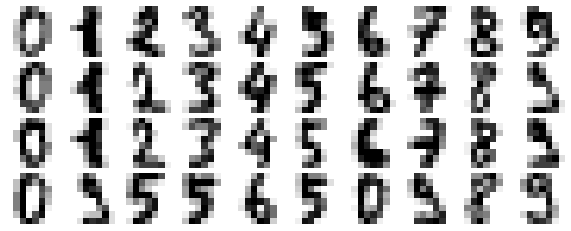

In [47]:
# function for plot the digits
def plot_digits(data):
    fig, ax = plt.subplots(4, 10, figsize=(10,4), subplot_kw={'xticks':[], 'yticks':[]}, 
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(ax.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))
        
# plot the original digits        
plot_digits(digits.data)

### 畫出加上高斯雜訊的資料

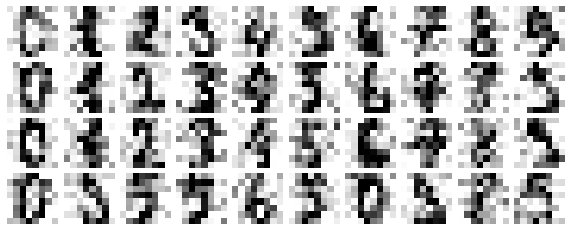

In [48]:
# plot the digit with noisy
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

### 在雜訊資料上訓練PCA，並保留50%的變異量

In [49]:
pca = PCA(0.50).fit(noisy)

訓練後50%的變異量，需要12個主成分

In [50]:
pca.n_components_

12

利用12個主成分進行計算，然後使用他們去反轉此轉換以重建此過濾過的數字

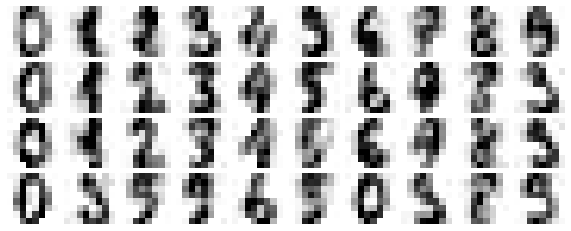

In [51]:
compoents = pca.transform(noisy)
filtered = pca.inverse_transform(compoents)
plot_digits(filtered)

### 選擇成分的數量

Text(0,0.5,'cumulativate explained variance')

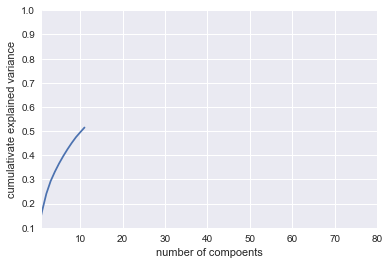

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(1,80)
plt.ylim(0.1, 1.0)
plt.xlabel('number of compoents')
plt.ylabel('cumulativate explained variance')

# 特徵臉

In [53]:
from sklearn.datasets import fetch_lfw_people

In [54]:
face = fetch_lfw_people(min_faces_per_person=60)

In [55]:
face.images.shape

(820, 62, 47)

In [56]:
from sklearn.decomposition import RandomizedPCA

In [57]:
pca = RandomizedPCA(150)
pca.fit(face.data)

RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

In [58]:
RandomizedPCA(copy=True, iterated_power=3, n_components=150, random_state=None, whiten=False)

RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=False)

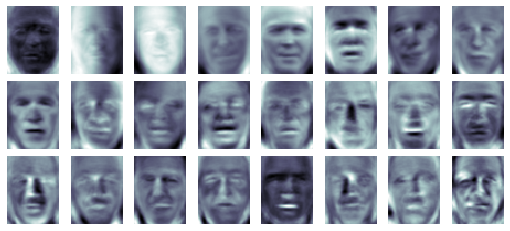

In [59]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}
                         , gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0,0.5,'cumulative explained variance')

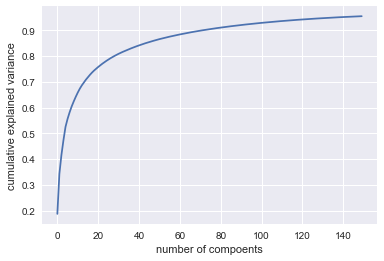

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of compoents')
plt.ylabel('cumulative explained variance')

In [62]:
pca = RandomizedPCA(150).fit(face.data)
compoents = pca.transform(face.data)
projected = pca.inverse_transform(compoents)

Text(0,0.5,'150-dim\nreconstruction')

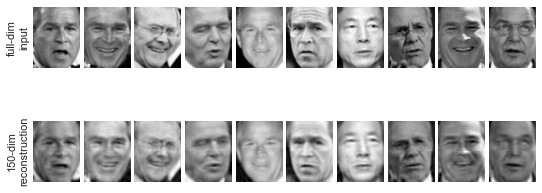

In [67]:
# plot the result
fig, ax = plt.subplots(2, 10, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}
                         , gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(face.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')